## Organize train/test patients

### Train

In [2]:
import os
import cv2
import pydicom
import numpy as np
import pandas as pd
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
from natsort import natsorted, ns

In [119]:
path = "data/"
p_path = os.listdir(path)
p_path = natsorted(p_path, alg=ns.PATH)

br_id = "R " # "R" "L"
pr_id = "CC " # "MLO" "CC"

list_ple, list_pdes, list_le, list_des = [], [], [], []

for p in p_path[10:]: #
    
    pfiles = glob(path + p + "/**/**/*.dcm")
    pfiles = natsorted(pfiles, alg=ns.PATH)
    idx_pr = []

    for i, pfile in enumerate(pfiles):
        #
        dcm_ = pydicom.dcmread(pfile)
        if br_id in dcm_.SeriesDescription and pr_id in dcm_.SeriesDescription:
            if   "LE"  in dcm_.SeriesDescription: list_le.append(pfile[len(path):]), list_ple.append(p)
            elif "DES" in dcm_.SeriesDescription: list_des.append(pfile[len(path):]), list_pdes.append(p)
        
print(len(list_le), len(list_des), len(list_ple), len(list_pdes))

44 44 44 44


In [120]:
print(list_ple, "\n", list_pdes, "\n", list_ple == list_pdes)
# print(list_le[:3], "\n", list_ple[:3], "\n", list_des[:3], "\n", list_pdes[:3])

['SCEDM012_MG1', 'SCEDM012_MG1', 'SCEDM013_MG1', 'SCEDM013_MG1', 'SCEDM015_MG1', 'SCEDM017_MG1', 'SCEDM018_MG1', 'SCEDM020_MG1', 'SCEDM021_MG1', 'SCEDM024_MG1', 'SCEDM027_MG1', 'SCEDM028_MG1', 'SCEDM029_MG1', 'SCEDM030_MG1', 'SCEDM030_MG1', 'SCEDM031_MG1', 'SCEDM031_MG1', 'SCEDM032_MG1', 'SCEDM033_MG1', 'SCEDM034_MG1', 'SCEDM034_MG1', 'SCEDM036_MG1', 'SCEDM037_MG1', 'SCEDM038_MG1', 'SCEDM039_MG1', 'SCEDM040_MG1', 'SCEDM041_MG1', 'SCEDM042_MG1', 'SCEDM044_MG1', 'SCEDM045_MG1', 'SCEDM046_MG1', 'SCEDM047_MG1', 'SCEDM048_MG1', 'SCEDM049_MG1', 'SCEDM050_MG1', 'SCEDM051_MG1', 'SCEDM052_MG1', 'SCEDM053_MG1', 'SCEDM053_MG1', 'SCEDM054_MG1', 'SCEDM055_MG1', 'SCEDM056_MG1', 'SCEDM057_MG1', 'SCEDM058_MG1'] 
 ['SCEDM012_MG1', 'SCEDM012_MG1', 'SCEDM013_MG1', 'SCEDM013_MG1', 'SCEDM015_MG1', 'SCEDM017_MG1', 'SCEDM018_MG1', 'SCEDM020_MG1', 'SCEDM021_MG1', 'SCEDM024_MG1', 'SCEDM027_MG1', 'SCEDM028_MG1', 'SCEDM029_MG1', 'SCEDM030_MG1', 'SCEDM030_MG1', 'SCEDM031_MG1', 'SCEDM031_MG1', 'SCEDM032_MG1', 'SCE

In [121]:
dict_ = {"patient_id": list_ple, "le_file": list_le, "rec_file": list_des}

dict_ = pd.DataFrame.from_dict(dict_)
dict_.to_csv("train_{0}_{1}.csv".format(br_id[:-1], pr_id[:-1]), index=False)

### Test

In [130]:
path = "data/"
p_path = os.listdir(path)
p_path = natsorted(p_path, alg=ns.PATH)

br_id = "R " # "R" "L"
pr_id = "CC " # "MLO" "CC"

list_ple, list_pdes, list_le, list_des = [], [], [], []

for p in p_path[:10]: #
    
    pfiles = glob(path + p + "/**/**/*.dcm")
    pfiles = natsorted(pfiles, alg=ns.PATH)
    idx_pr = []

    for i, pfile in enumerate(pfiles):
        #
        dcm_ = pydicom.dcmread(pfile)
        if br_id in dcm_.SeriesDescription and pr_id in dcm_.SeriesDescription:
            if   "LE"  in dcm_.SeriesDescription: list_le.append(pfile[len(path):]), list_ple.append(p)
            elif "DES" in dcm_.SeriesDescription: list_des.append(pfile[len(path):]), list_pdes.append(p)
        
print(len(list_le), len(list_des), len(list_ple), len(list_pdes))

12 12 12 12


In [131]:
print(list_ple, "\n", list_pdes, "\n", list_ple == list_pdes)

['SCEDM001_MG1', 'SCEDM002_MG1', 'SCEDM003_MG1', 'SCEDM004_MG1', 'SCEDM005_MG1', 'SCEDM006_MG1', 'SCEDM006_MG1', 'SCEDM007_MG1', 'SCEDM007_MG1', 'SCEDM008_MG1', 'SCEDM009_MG1', 'SCEDM010_MG1'] 
 ['SCEDM001_MG1', 'SCEDM002_MG1', 'SCEDM003_MG1', 'SCEDM004_MG1', 'SCEDM005_MG1', 'SCEDM006_MG1', 'SCEDM006_MG1', 'SCEDM007_MG1', 'SCEDM007_MG1', 'SCEDM008_MG1', 'SCEDM009_MG1', 'SCEDM010_MG1'] 
 True


In [132]:
dict_ = {"patient_id": list_ple, "le_file": list_le, "rec_file": list_des}

dict_ = pd.DataFrame.from_dict(dict_)
dict_.to_csv("test_{0}_{1}.csv".format(br_id[:-1], pr_id[:-1]), index=False)

## Extract patches from dcm's

### Train

In [ ]:
import os
import cv2
import pydicom
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from natsort import natsorted, ns

: 

In [2]:
def clamp_histogram(im_, range_ = [2020, 2280]):
    #
    im_fg = []
    # min_, max_ = 2020, 2280
    min_, max_ = range_
    
    for px in im_.ravel():
        if   px < min_: im_fg.append(min_) 
        elif min_ <= px <= max_: im_fg.append(px)
        elif px > max_: im_fg.append(max_)
    
    im_fg = np.array(im_fg).reshape(im_.shape)
    return im_fg


def scaler(im, range_in = [], range_out = []):
    if range_in == []:  min_, max_ = im.min(), im.max()
    else: min_, max_ = np.min(range_in), np.max(range_in)
    range_out = np.asarray(range_out)
    return (range_out.max() - range_out.min()) * (im - min_) / (max_ - min_) + range_out.min()


def extract_patches (images, n_patches = 25, patch_size = 256, return_patch_locs=False):
    #
    # n_patches = 25
    # patch_size = 256
    im_1, im_2 = images
    locs = np.array(np.where(im_1 > 0)).T
    
    patches_im1, patches_im2 = [], []
    im_1_c = im_1.copy() 
    im_2_c = im_2.copy()
    np.random.seed(0)
    i = 0
    
    while len(patches_im1) < n_patches and i < 200:
        #
        i += 1
        lucky = np.random.randint(0, len(locs))
        patch_le = im_1[locs[lucky][0]:locs[lucky][0]+patch_size, locs[lucky][1]:locs[lucky][1]+patch_size]
        patch_rc = im_2[locs[lucky][0]:locs[lucky][0]+patch_size, locs[lucky][1]:locs[lucky][1]+patch_size]
        if 0 not in patch_rc:
            im_1_c = cv2.rectangle(im_1_c, (locs[lucky][1], locs[lucky][0]), (locs[lucky][1]+patch_size, locs[lucky][0]+patch_size), (1), (10))
            im_2_c = cv2.rectangle(im_2_c, (locs[lucky][1], locs[lucky][0]), (locs[lucky][1]+patch_size, locs[lucky][0]+patch_size), (1), (10))
            patches_im1.append(patch_le)
            patches_im2.append(patch_rc)
    
    patches_im1, patches_im2 = np.array(patches_im1), np.array(patches_im2)
    
    if not return_patch_locs: return patches_im1, patches_im2
    else: return patches_im1, patches_im2, im_1_c, im_2_c 

def save_images(patches, name, output_path, subset, side, proj):
    #
    # os.makedirs(output_path, exist_ok = True)
    os.makedirs(output_path + "LE/" + subset, exist_ok = True)
    os.makedirs(output_path + "RC/" + subset, exist_ok = True)
    
    patches_le, patches_rc = patches
    
    for i, (patch_le, patch_rc) in enumerate(zip(patches_le, patches_rc)):
        _ = Image.fromarray(patch_le).save('{0}/LE/{1}/{2}_{3}_{4}_{5}.tif'.format(output_path, subset, name, proj, side, i))
        _ = Image.fromarray(patch_rc).save('{0}/RC/{1}/{2}_{3}_{4}_{5}.tif'.format(output_path, subset, name, proj, side, i))

In [ ]:
path = "data/"

subset = "train"
b_id = "L" #"R"
pr_id = "CC"

# meta_ = pd.read_csv("train_L_MLO.csv")
meta_ = pd.read_csv("{0}_{1}_{2}.csv".format(subset, b_id, pr_id))

for i in range(5): #tqdm(meta_.index, ncols = 100):
    # print(path + meta_["le_file"].iloc[i], path + meta_["rec_file"].iloc[i])
    name_p = meta_["le_file"].iloc[i] [:meta_["le_file"].iloc[i].find("/")-4]
    print (name_p + b_id + pr_id)
    
    dcm1 = pydicom.dcmread(path + meta_["le_file"].iloc[i]).pixel_array
    dcm2 = pydicom.dcmread(path + meta_["rec_file"].iloc[i]).pixel_array
    
    wl, ww = 2020, 2280
    
    dcm2 = clamp_histogram(dcm2, range_ = [wl, ww])
    
    dcm1 = scaler(dcm1, range_out = [0,1])
    dcm2 = scaler(dcm2, range_out = [0,1])
    
    patches_le, patches_rc, im_1_c, im_2_c = extract_patches ([dcm1, dcm2], n_patches = 100, patch_size = 256, return_patch_locs=True)
    
    _, axes = plt.subplots(1,2, figsize=(12, 8))
    axes[0].imshow(im_1_c, cmap="gray")
    axes[1].imshow(im_2_c, cmap="gray")
    
    for ax in axes: ax.set_axis_off()
    plt.tight_layout()
    os.makedirs("cesm_patches/vis/{0}/".format(subset), exist_ok = True)
    plt.savefig("cesm_patches/vis/{0}/{1}_{2}_{3}.png".format(subset, name_p, b_id, pr_id))
#    #plt.show()
    
    save_images([patches_le, patches_rc], name = name_p, output_path = "cesm_patches/", subset = subset, side = b_id, proj = pr_id)




### Test

In [4]:
import os
import cv2
import pydicom
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from natsort import natsorted, ns

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

SCEDM001LMLO


 10%|██████▍                                                         | 1/10 [00:17<02:41, 17.97s/it]

SCEDM002LMLO


 20%|████████████▊                                                   | 2/10 [00:35<02:23, 17.99s/it]

SCEDM003LMLO


 30%|███████████████████▏                                            | 3/10 [01:05<02:44, 23.48s/it]

SCEDM004LMLO


 40%|█████████████████████████▌                                      | 4/10 [01:24<02:08, 21.38s/it]

SCEDM005LMLO


 50%|████████████████████████████████                                | 5/10 [01:50<01:56, 23.24s/it]

SCEDM006LMLO


 60%|██████████████████████████████████████▍                         | 6/10 [02:08<01:25, 21.47s/it]

SCEDM007LMLO


 70%|████████████████████████████████████████████▊                   | 7/10 [02:22<00:57, 19.09s/it]

SCEDM008LMLO


 80%|███████████████████████████████████████████████████▏            | 8/10 [02:40<00:37, 18.65s/it]

SCEDM009LMLO


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [02:57<00:18, 18.22s/it]

SCEDM010LMLO


100%|███████████████████████████████████████████████████████████████| 10/10 [03:12<00:00, 19.24s/it]


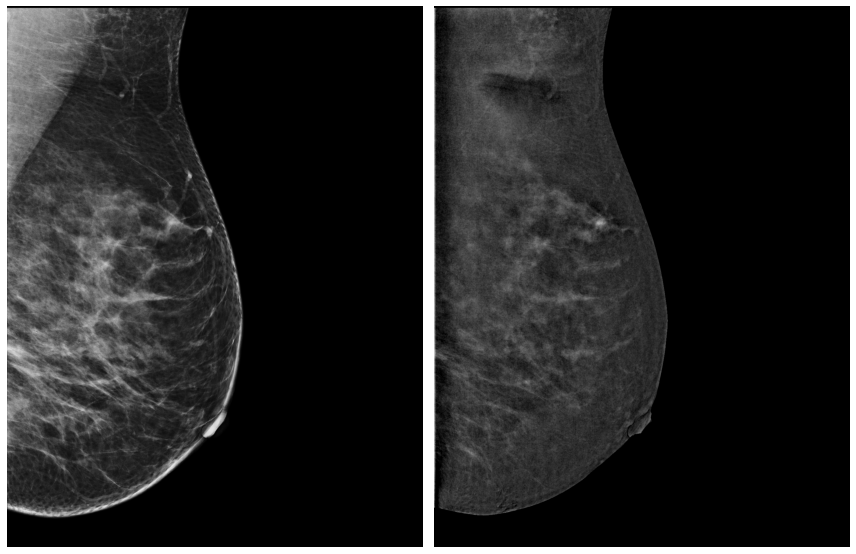

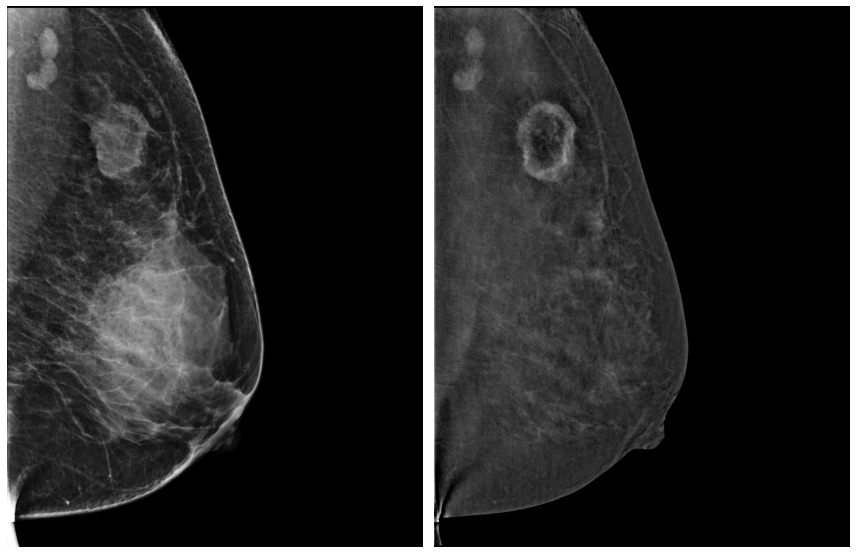

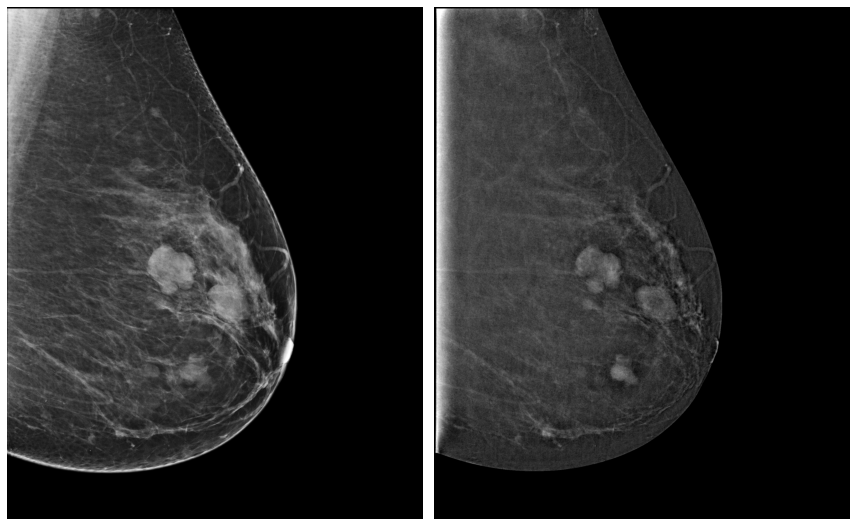

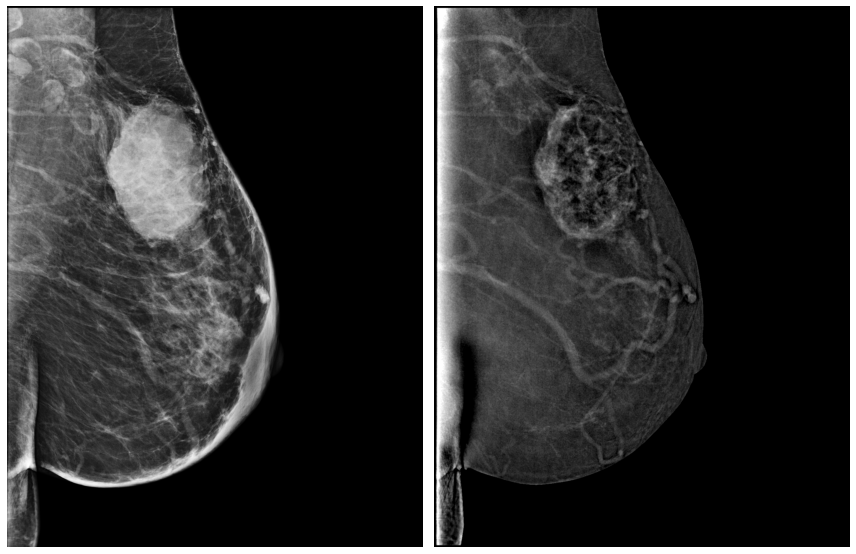

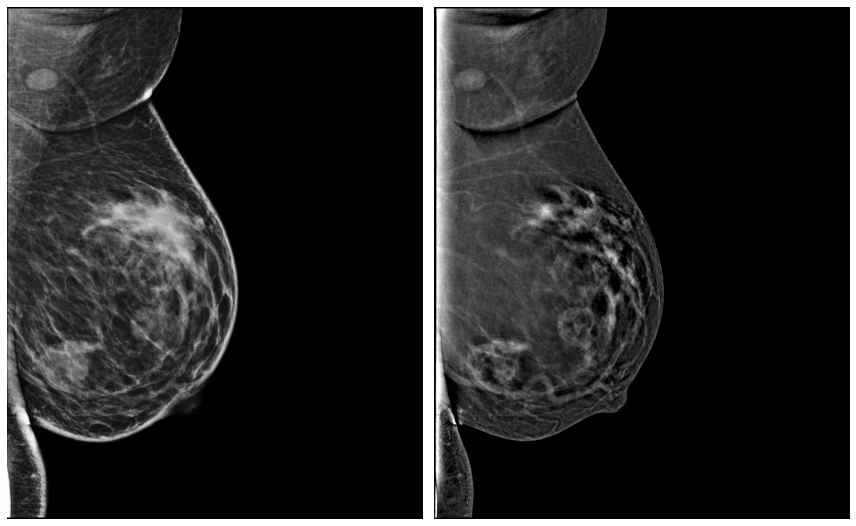

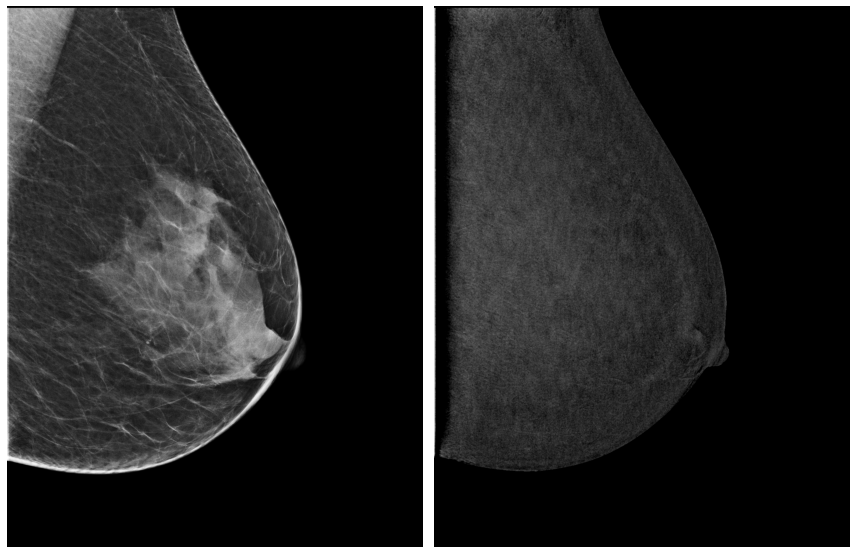

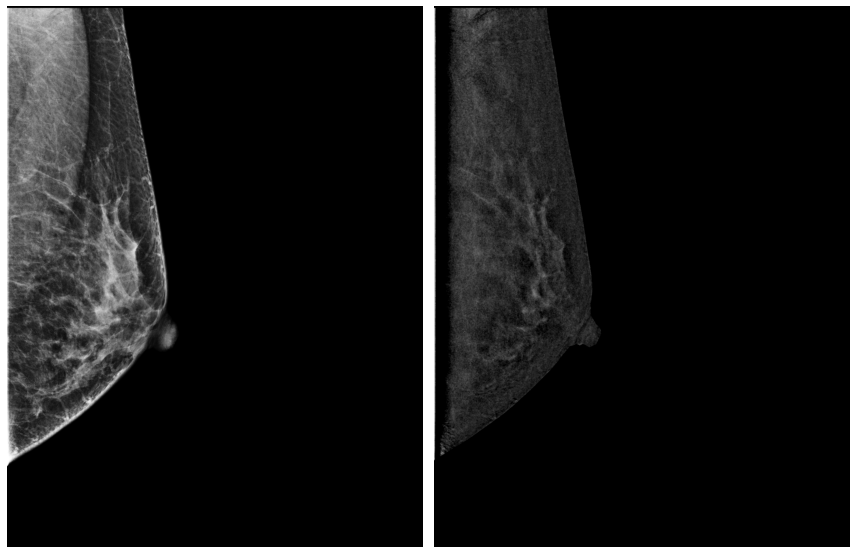

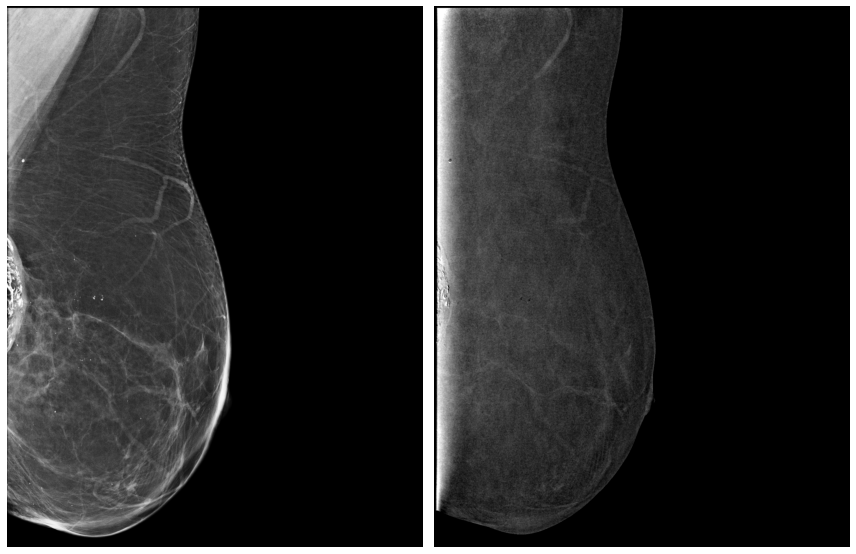

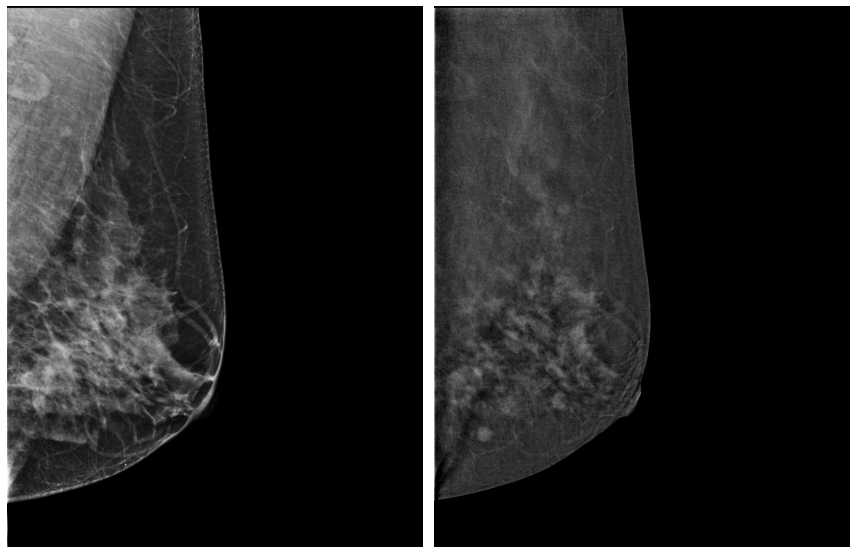

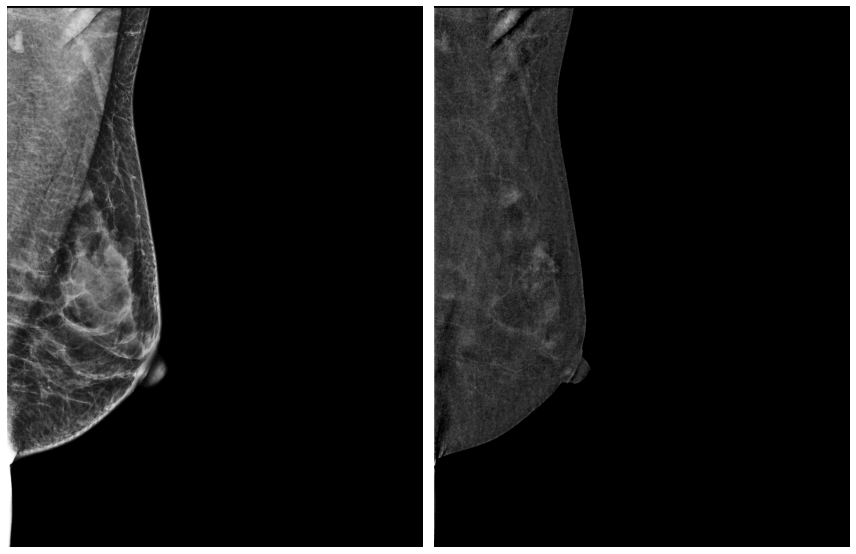

In [9]:
path = "data/"

subset = "test"
b_id = "L" #"R"
pr_id = "MLO"

# meta_ = pd.read_csv("train_L_MLO.csv")
meta_ = pd.read_csv("{0}_{1}_{2}.csv".format(subset, b_id, pr_id))

for i in tqdm(meta_.index, ncols = 100): #range(5): #
    # print(path + meta_["le_file"].iloc[i], path + meta_["rec_file"].iloc[i])
    name_p = meta_["le_file"].iloc[i] [:meta_["le_file"].iloc[i].find("/")-4]
    print (name_p + b_id + pr_id)
    
    dcm1 = pydicom.dcmread(path + meta_["le_file"].iloc[i]).pixel_array
    dcm2 = pydicom.dcmread(path + meta_["rec_file"].iloc[i]).pixel_array
    
    wl, ww = 2020, 2280
    
    dcm2 = clamp_histogram(dcm2, range_ = [wl, ww])
    
    dcm1 = scaler(dcm1, range_out = [0,1])
    dcm2 = scaler(dcm2, range_out = [0,1])
    
    # patches_le, patches_rc, im_1_c, im_2_c = extract_patches ([dcm1, dcm2], n_patches = 100, patch_size = 256, return_patch_locs=True)
    
    _, axes = plt.subplots(1,2, figsize=(12, 8))
    axes[0].imshow(dcm1, cmap="gray")
    axes[1].imshow(dcm2, cmap="gray")
    
    for ax in axes: ax.set_axis_off()
    plt.tight_layout()
    os.makedirs("cesm_patches/vis/{0}/".format(subset), exist_ok = True)
    plt.savefig("cesm_patches/vis/{0}/{1}_{2}_{3}.png".format(subset, name_p, b_id, pr_id))
#    #plt.show()
    
    save_images([[dcm1], [dcm2]], name = name_p, output_path = "cesm_patches/", subset = subset, side = b_id, proj = pr_id)


